In [1]:
import numpy as np
import numpy.random as rn
import matplotlib.pyplot as plt

import matplotlib

In [2]:
%matplotlib inline
matplotlib.rc(
    "text",
    usetex = True
)
matplotlib.rc(
    "font",
    **{"family": "serif", "serif": ["Computer Modern"]}
)
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']
!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng
matplotlib.pyplot.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Computer Modern Serif"]
})
matplotlib.pyplot.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})

matplotlib.rcParams["figure.dpi"] = 500

The operation couldn’t be completed. Unable to locate a Java Runtime that supports apt.
Please visit http://www.java.com for information on installing Java.



/var/folders/k8/70wz7nzd2z95c_59g8wv_mf00000gn/T/ipykernel_3312/3971656456.py:10: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']


# Exercise 10.2

In this exercise notebook, we shall try to answer Exercise 10.2.

Your first task is to define two functions. The first function, p(t, tau) calculates the probability that a single particle with a half-life tau (in units of seconds) would decay after t seconds with
\begin{equation}
p(t; \tau) = 1 - 2^{-t/\tau}
\end{equation}

The second function, check_decay(t, tau), would use a randomly generated floating point $x$ (using rn.random) to implement the following function
\begin{equation}
\textrm{check_decay}(t, \tau) = \left\lbrace
\begin{matrix}
0 \leq x \leq p(t; \tau) & \textrm{return True} \\
p(t; \tau) < x & \textrm{return False} \\
\end{matrix}
\right.
\end{equation}

In [3]:
def p(t, tau):
    return 1.0 - (2.0 ** (- t / tau))
    
def check_decay(t, tau):
    x = rn.random()
    if (x >= 0) and (x <= p(t, tau)):
        return True
    elif x > p(t, tau):
        return False

These functions would most likely pass the following tests (after 1 second, half the atoms with a half-life of 1 second should decay)

In [4]:
N = 10_000
error = 0.1
tau = 1
t = 1
decay_pop = 0
for _ in range(N):
    if check_decay(t, tau):
        decay_pop += 1
        N -= 1

assert abs(N - decay_pop)/N < error ## the population of N and decay_pop should be almost equal after a half-life

Next, write two functions, update_PbBi(t, Pb209_pop, Bi209_pop) and update_TlPb(t, Pb209_pop, Bi209_pop). These two functions does essentially the same thing.

update_PbBi goes through each atom of Pb-209 (with the number of atoms given by Pb209_pop), and uses check_decay to determine whether or not each individual atom decays or not. If a Pb-209 atom decays, Pb209_pop is decreased by 1 while Bi209_pop is increased by 1. The new values of Pb209_pop and Bi209_pop is returned.

The same is done for update_TlPb. Note that the half-life of Pb-209 atoms is 198 seconds while the half-life of Tl-209 is 132 seconds.

In [5]:
def update_PbBi(t, Pb209_pop, Bi209_pop):
    tau_Pb209 = 3.3 * 60.0
    for _ in range(0, Pb209_pop, 1):
        if check_decay(t, tau_Pb209) == True:
            Pb209_pop -= 1
            Bi209_pop += 1
    return Pb209_pop, Bi209_pop

def update_TlPb(t, Tl209_pop, Pb209_pop):
    tau_Tl209 = 2.2 * 60.0
    for _ in range(0, Tl209_pop, 1):
        if check_decay(t, tau_Tl209) == True:
            Tl209_pop -= 1
            Pb209_pop += 1
    return Tl209_pop, Pb209_pop

These functions should pass the following tests (based on half-lives of Pb and Tl)

In [6]:
Pb209_pop = 100_000
Bi209_pop = 0
error = 0.01
t = 198*2

Pb209_pop, Bi209_pop = update_PbBi(t, Pb209_pop, Bi209_pop)

assert abs(Pb209_pop*3 - Bi209_pop)/(Pb209_pop+Bi209_pop) < error 
## after two half-lives, the ratio between Pb_atoms and Bi atoms should be 1:3

In [7]:
Tl209_pop = 100_000
Pb209_pop = 0
error = 0.01
t = 132*3

Tl209_pop, Pb209_pop = update_TlPb(t, Tl209_pop, Pb209_pop)

assert abs(7*Tl209_pop - Pb209_pop)/(Tl209_pop - Pb209_pop) < error 
## after three half-lives, the ratio between Tl atoms and Pb atoms should be 1:7

In the following, define two new functions. The first function, decide_Bidecay() uses a randomly generated floating point 𝑥 (using rn.random) to implement the following function
\begin{equation}
\textrm{decide_Bidecay}() = \left\lbrace
\begin{matrix}
0 \leq x \leq 0.0209 & \textrm{return 'Tl'} \\
0.0209 < x & \textrm{return 'Pb'}
\end{matrix}
\right.
\end{equation}
The second function, update_BiTlPb(t, Bi213_pop, Tl209_pop, Pb209_pop), which does something similar as update_PbBi and update_TlPb except that after a Bi-213 atom has decided that it'll decay, it'll use decide_Bidecay to decide whether the Bi-213 atoms decays into a Tl-209 atom or a Pb-209 atom.

The function update_BiTlPb returns Bi213_pop, Tl209_pop, Pb209_pop in that order.

Note that the half-life of Bi-213 atoms is 2760 seconds.

In [8]:
def decide_Bidecay():
    x = rn.random()
    if (x >= 0.0) and (x <= 0.0209):
        return "Tl"
    elif x > 0.0209:
        return "Pb"
    
def update_BiTlPb(t, Bi213_pop, Tl209_pop, Pb209_pop):
    tau_Bi213 = 46.0 * 60.0
    missing = 0
    for _ in range(0, Bi213_pop, 1):
        if check_decay(t, tau_Bi213) == True:
            Bi213_pop -= 1
            if decide_Bidecay() == "Tl":
                Tl209_pop += 1
            else:
                Pb209_pop += 1
    #print("Total Bi213 atoms: " + str(Bi213_pop))
    #print("Total Tl209 and Pb209 atoms: " + str(Tl209_pop + Pb209_pop))
    #print("Total Atoms: " + str(Bi213_pop + Tl209_pop + Pb209_pop))
    #print("Total Tl209 atoms: " + str(Tl209_pop))
    #print("Percentage of Tl209 atoms: " + str(Tl209_pop/Bi213_pop * 100) + "%")
    #print("Total Pb209 atoms: " + str(Pb209_pop))
    #print("Percentage of Pb209 atoms: " + str(Pb209_pop/Bi213_pop * 100) + "%")
    return Bi213_pop, Tl209_pop, Pb209_pop

It should pass the following tests most of the time

In [9]:
Bi213_pop = 1_000_000
Tl209_pop = 0
Pb209_pop = 0
total = Bi213_pop + Tl209_pop + Pb209_pop
error = 0.01
t = 2760

Bi213_pop, Tl209_pop, Pb209_pop = update_BiTlPb(t, Bi213_pop, Tl209_pop, Pb209_pop)

## after a half-life, Bi213_pop should be halved.
assert abs(Bi213_pop - (Tl209_pop + Pb209_pop))/total < error
## after a half-life, the ratio between Tl and Pb atoms should be 2.09:97.91
decay_pop = Tl209_pop + Pb209_pop
assert abs(Tl209_pop*97.91 - Pb209_pop*2.09)/decay_pop < error

We finally have all the tools to answer Exercise 10.2. Starting with a sample consisting of 10,000 Bi-213 atoms, simulate the decay of atoms by dividing time into slices of length $\delta t = 1$ second each and doing the following in order
1. Update the number of Bi-209 and Pb-209 atoms using update_PbBi
2. Update the number of Pb-209 and Tl-209 atoms using update_TlPb
3. Update the number of Bi-213, Tl-209 and Pb-209 atoms using update_BiTlPb

Keep track the number of atoms of each of the four isotopes at all times for 20,000 seconds.

The final output of this notebook should be a plot showing the four numbers as a function of time.

In [10]:
def update_PbBi(t, Pb209_pop, Bi209_pop):
    tau_Pb209 = 3.3 * 60.0
    for _ in range(0, Pb209_pop, 1):
        if check_decay(t, tau_Pb209) == True:
            Pb209_pop -= 1
            Bi209_pop += 1
    return Pb209_pop, Bi209_pop

def update_TlPb(t, Tl209_pop, Pb209_pop):
    tau_Tl209 = 2.2 * 60.0
    for _ in range(0, Tl209_pop, 1):
        if check_decay(t, tau_Tl209) == True:
            Tl209_pop -= 1
            Pb209_pop += 1
    return Tl209_pop, Pb209_pop

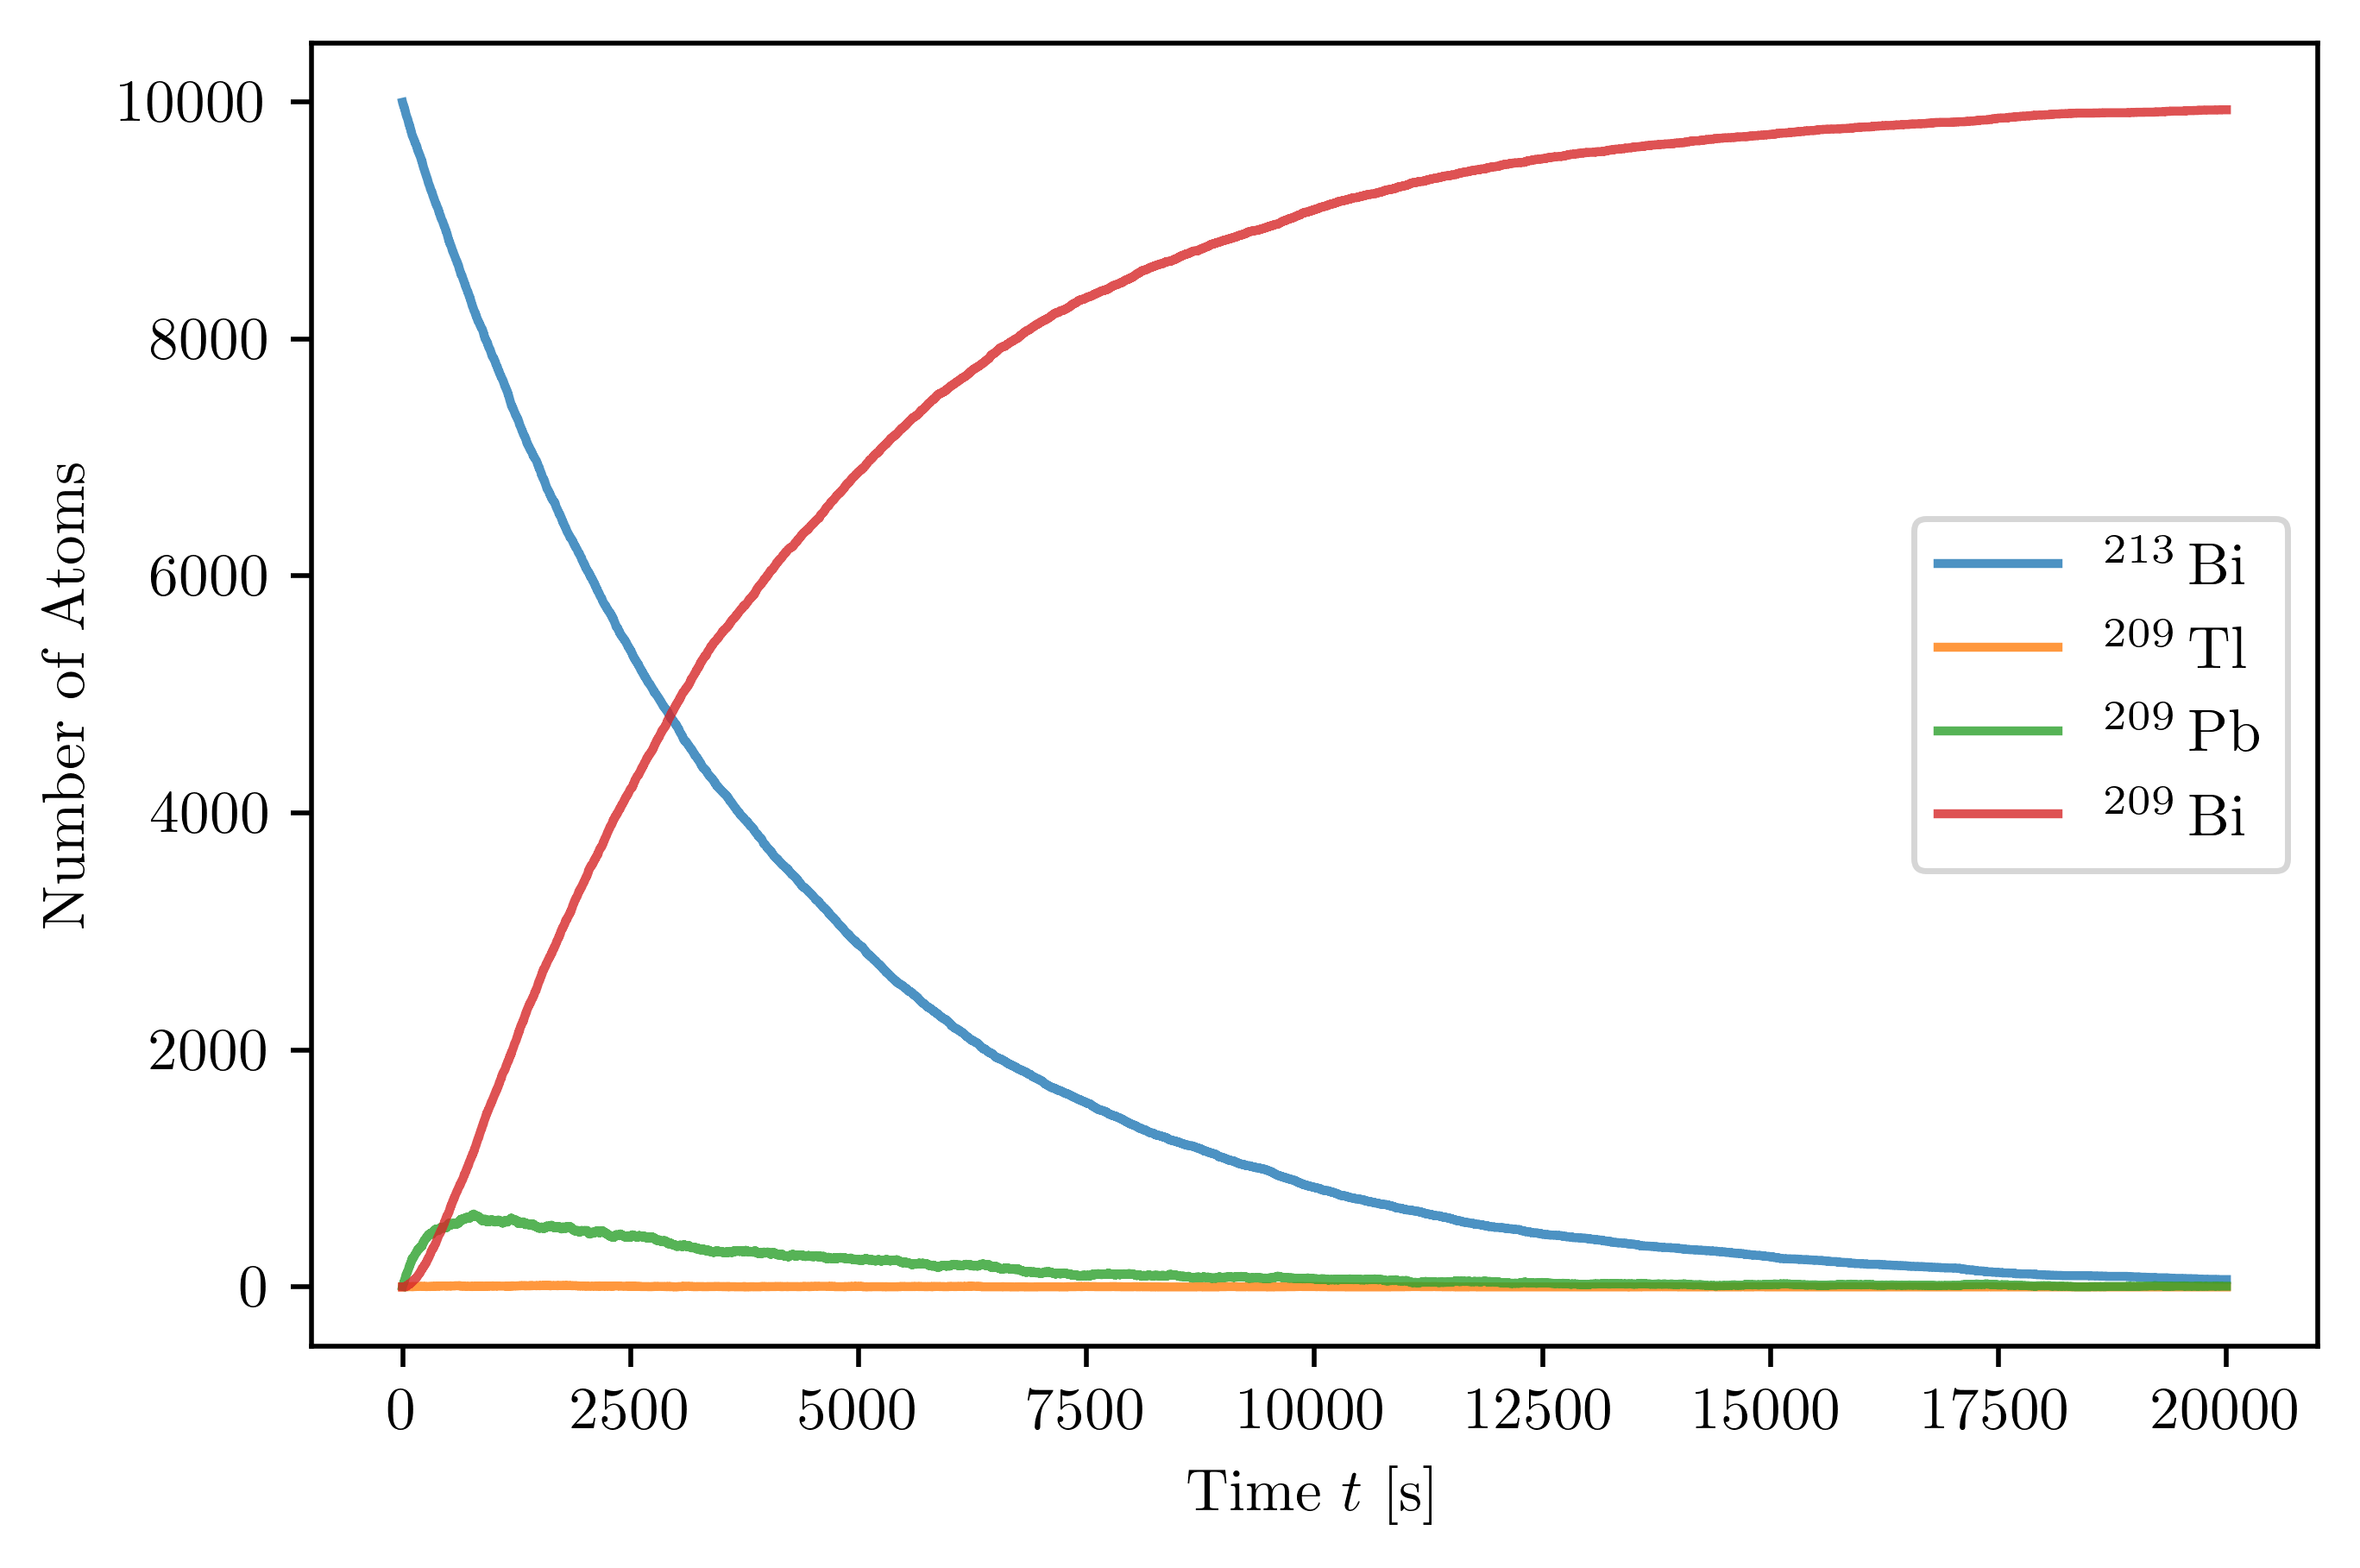

In [11]:
Bi213_pop = 10_000
Tl209_pop = 0
Pb209_pop = 0
Bi209_pop = 0
t = 1.0
t_end = 20_000

Bi213 = []
Tl209 = []
Pb209 = []
Bi209 = []
T = np.arange(0, t_end, t)

for _ in T:
    Pb209_pop, Bi209_pop = update_PbBi(t, Pb209_pop, Bi209_pop)
    Tl209_pop, Pb209_pop = update_TlPb(t, Tl209_pop, Pb209_pop)
    Bi213_pop, Tl209_pop, Pb209_pop = update_BiTlPb(t, Bi213_pop, Tl209_pop, Pb209_pop)
    Bi213.append(Bi213_pop)
    Tl209.append(Tl209_pop)
    Pb209.append(Pb209_pop)
    Bi209.append(Bi209_pop)
    
plt.plot(T, Bi213, alpha = 0.8, label = r"${^{213} \!}$ Bi")
plt.plot(T, Tl209, alpha = 0.8, label = r"${^{209} \!}$ Tl")
plt.plot(T, Pb209, alpha = 0.8, label = r"${^{209} \!}$ Pb")
plt.plot(T, Bi209, alpha = 0.8, label = r"${^{209} \!}$ Bi")
plt.xlabel(r"Time ${t}$ [s]")
plt.ylabel(r"Number of Atoms")
plt.legend()
plt.show()